# Model Description

This model determines the ending locations of agents. There are N agents in M locations.

Agents move proportionally to cities based on populations of the cities: the likelihood of moving to a particular city $m$ is equal to $pop_m / \Sigma_{i=1}^{m} pop_i$. 
Thus, as a city grows, the more likely it is to continue growing. This means that at each step, the likelihoods for cities is recalculated. 

This should, in theory, not be a fast model. With the current state of np.random._____() it is relatively quick. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define variables and Functions

1. **N**: the number of agents
2. **M**: the number of locations
3. **T**: the amount of iterations to execute the simulation
4. **P**: the probability an agent will move in an iteration

In [2]:
N = 1000
M = 100
T = 1000
P = 0.5

In [3]:
def build_pop_df(df):
    pop_df = df.groupby('location').count()
    pop_df['agent'] = pop_df['agent'] 
    pop_df = pop_df.reset_index()
    return pop_df

def find_position(array, idx, x):
    array_bool = ([0 if i>x else 1 for i in array])
    return idx[sum(array_bool)]

def build_move_to_df(df):
    locs = df['location'].tolist()
    agents = df['agent'].tolist()
    out_locs = []
    for i in range(len(agents)):
        out_locs += [locs[i]] * agents[i]
    move_to_df = pd.DataFrame({'move_to':out_locs})
    move_to_df = move_to_df.reset_index()
    move_to_df.columns = ['lookup','move_to']
    return move_to_df

## Instantiate model

1. **df**: the dataframe holding the Agent Based Model
2. **pop_df**: the dataframe holding the location populations

In [4]:
df = pd.DataFrame({'agent':[i for i in range(N)], 
                    'location': np.random.randint(0, 100, size=N)})

pop_df = build_pop_df(df)
move_to_df = build_move_to_df(pop_df)

## Execute the model

In [5]:
locations_df = pd.DataFrame({'location':df['location'].tolist()})

for t in range(T):
    pop_df = build_pop_df(df)
    move_to_df = build_move_to_df(pop_df)
    df['move'] = np.random.random(size=N)
    df['move'] = df['move'].apply(lambda x: 1 if x < P else 0)
    df['lookup'] = np.random.randint(0,N,size=N)
    df = df.merge(move_to_df,how='left',on='lookup')
    df['location'] = df.apply(lambda x: x['location'] if x['move']==0 else x['move_to'], axis=1)
    df = df[['agent','location']].copy()
    locations_df = pd.concat([locations_df, df[['location']]], axis=1)

## View outcome

Text(0, 0.5, 'Population')

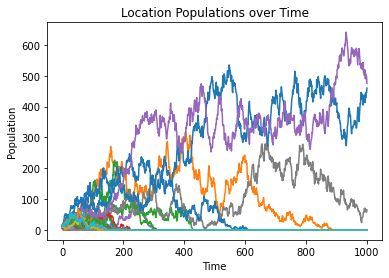

In [6]:
outcome_ts = {i:[0]*(T+1) for i in range(M)}

locations_df.columns = [i for i in range(locations_df.shape[1])]

for col in locations_df.columns.tolist():
    d = locations_df[col].tolist()
    for i in d:
        outcome_ts[i][col] += 1

for k,v in outcome_ts.items():
    plt.plot(v)
plt.title('Location Populations over Time')
plt.xlabel('Time')
plt.ylabel('Population')